### Feature engineering 

#### Cyclical features

Variables normally treated as ordinals but that represents a cycle:

+ Time: minutes, hours, seconds
+ Day of the week
+ Month of the year
+ Week of the month
+ Week of the year
+ Season

Most of the times when we want to use these kind of features in an algorithm we use their ordinal representation. By doing this, we lack to include their nature of being part of a cycle and so to configure that the first value of a cyclical feature is **near** the last value of the same variable. For example: 

- December is near January
- 23:00 is near 3:00 
- Sunday is near Monday

The best way to deal with these kind of variables is to make a transformation that includes this characteristics of being cyclical using the Sine and Cosine wave functions. 

In [15]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5,0,'observation number')

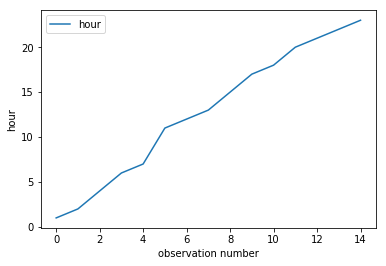

In [30]:
# generate some random hours
hours = list(np.random.choice(a=24, size=15, replace=False))
df = pd.DataFrame({'hour': hours})
# to visualize it better
df = df.sort_values('hour').reset_index(drop=True)

df.plot()
plt.ylabel('hour')
plt.xlabel('observation number')

Lest get the sine and cosine for each hour.

In [17]:
HOURS = 24

df['sin_hr'] = np.sin(2*np.pi*df.hour/HOURS)
df['cos_hr'] = np.cos(2*np.pi*df.hour/HOURS)

df

,hour,sin_hr,cos_hr
0,0,0.000000e+00,1.000000
1,2,5.000000e-01,0.866025
2,4,8.660254e-01,0.500000
3,5,9.659258e-01,0.258819
4,7,9.659258e-01,-0.258819
5,8,8.660254e-01,-0.500000
6,9,7.071068e-01,-0.707107
7,10,5.000000e-01,-0.866025
8,11,2.588190e-01,-0.965926
9,12,1.224647e-16,-1.000000


If you only use the sine transformation you will end up having 2 different values for each point of your original cyclical feature. For example, the sine transformation for the 11:00 hour corresponds to 0.25, but have to different values on the sine wave (if you use the 24 different values for an hour your sine wave will look prettier).

Text(0.5,1,'sine transformation')

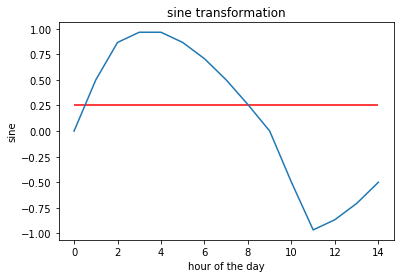

In [20]:
df.sin_hr.plot()
plt.hlines(0.25, 0, 14, colors='r')
plt.ylabel('sine')
plt.xlabel('hour of the day')
plt.title('sine transformation')

We need to have only 1 value per observation, that is why we also need the cosine transformation. 

Text(0.5,1,'cosine transformation')

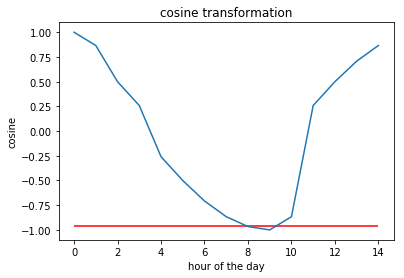

In [21]:
df.cos_hr.plot()
plt.hlines(-0.96,0,14, color='r')
plt.ylabel('cosine')
plt.xlabel('hour of the day')
plt.title('cosine transformation')

Notice that for the 11:00 hour we also have two different values on the cosine wave.

But when we use both, sine and cosine as a coordinate, we end up having original values of hours near the ones that should be close, i.e. 11:00 to 12:00.

Text(0.5,1,'sine-cosine transformation')

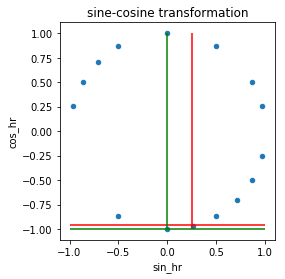

In [29]:
df.plot.scatter('sin_hr', 'cos_hr').set_aspect('equal')
plt.hlines(-0.96, -1, 1, color='r') # hour 11
plt.vlines(0.25, -1, 1, color='r') # hour 11 
plt.hlines(-1, -1, 1, color='g') # hour 12
plt.vlines(0, -1, 1, color='g') # hour 12
plt.title("sine-cosine transformation")

The same transformation can be used for all the cyclical features mentioned before. In this way you will preserve important information about these features in your algorithms.